# Step 1: import data
The data comes from the world weather (https://www.worldweatheronline.com/). <br/>

The package, wwo_hist (https://github.com/ekapope/WorldWeatherOnline), is used to retrieve and transform historical weather data. 

The *maxtempC, mintempC, sunHour, FeelsLikeC, HeatIndexC, and WindGustKmph* are the variables of interests.

The data, the weather data in Shanghai betweeen 01-JAN-2017 and 31-DEC-2019, is collected by API, wwo_hist, and is transformed into into pandas dataframe and csv.

**Note: pip install wwo-hist**

In [1]:
pip install wwo-hist

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats
from wwo_hist import retrieve_hist_data

%matplotlib inline

MY_KEY = "916be3826f9b41c0af3234741210801"

In [3]:
frequency = 24  # Intervals between two data points, in hours
start_date = '01-JAN-2017'
end_date = '31-DEC-2019'
api_key = MY_KEY
location_list = ['shanghai']

hist_weather_data = retrieve_hist_data(api_key,
                                location_list,
                                start_date,
                                end_date,
                                frequency,
                                location_label = False,
                                export_csv = True,
                                store_df = True)



Retrieving weather data for shanghai


Currently retrieving data for shanghai: from 2017-01-01 to 2017-01-31
Time elapsed (hh:mm:ss.ms) 0:00:00.946562
Currently retrieving data for shanghai: from 2017-02-01 to 2017-02-28
Time elapsed (hh:mm:ss.ms) 0:00:01.688545
Currently retrieving data for shanghai: from 2017-03-01 to 2017-03-31
Time elapsed (hh:mm:ss.ms) 0:00:02.524705
Currently retrieving data for shanghai: from 2017-04-01 to 2017-04-30
Time elapsed (hh:mm:ss.ms) 0:00:03.225179
Currently retrieving data for shanghai: from 2017-05-01 to 2017-05-31
Time elapsed (hh:mm:ss.ms) 0:00:03.963730
Currently retrieving data for shanghai: from 2017-06-01 to 2017-06-30
Time elapsed (hh:mm:ss.ms) 0:00:04.579095
Currently retrieving data for shanghai: from 2017-07-01 to 2017-07-31
Time elapsed (hh:mm:ss.ms) 0:00:06.093919
Currently retrieving data for shanghai: from 2017-08-01 to 2017-08-31
Time elapsed (hh:mm:ss.ms) 0:00:06.875622
Currently retrieving data for shanghai: from 2017-09-01 to 2017

# Step 2: Perform data preparation & cleaning

Load the weather data (csv file) obtained by API and saved to local.

Select data according to the variables of interest.

In [4]:
df = pd.read_csv("shanghai.csv")
variables_interests = ['date_time','maxtempC', 'mintempC','sunHour',
                       'FeelsLikeC','HeatIndexC','WindGustKmph']
weather_df = df[variables_interests].copy()
weather_df

,date_time,maxtempC,mintempC,sunHour,FeelsLikeC,HeatIndexC,WindGustKmph
0,2017-01-01,14,7,3.9,10,11,22
1,2017-01-02,15,9,5.5,12,13,12
2,2017-01-03,15,7,8.7,11,11,12
3,2017-01-04,14,10,5.5,12,13,17
4,2017-01-05,11,11,3.9,9,11,28
...,...,...,...,...,...,...,...
1090,2019-12-27,13,7,8.7,8,10,10
1091,2019-12-28,12,6,8.7,7,9,15
1092,2019-12-29,12,5,3.9,11,11,12
1093,2019-12-30,13,8,7.1,10,11,18


Explore the number of rows & columns, ranges of values, etc. 

No null data or missing data.

In [5]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date_time     1095 non-null   object 
 1   maxtempC      1095 non-null   int64  
 2   mintempC      1095 non-null   int64  
 3   sunHour       1095 non-null   float64
 4   FeelsLikeC    1095 non-null   int64  
 5   HeatIndexC    1095 non-null   int64  
 6   WindGustKmph  1095 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 60.0+ KB


Ceate additional columns：
- meantemp ((maxtempC + mintempC) // 2)
- maxtempdiff (maxtempC - mintempC)

In [6]:
max_temp = weather_df["maxtempC"]
min_temp = weather_df["mintempC"]
max_temp_diff = max_temp - min_temp
mean_temp = (max_temp + min_temp) // 2
weather_df["maxtempdiff"] = max_temp_diff
weather_df["meantemp"] = mean_temp

# Step 3: Perform exploratory analysis and ask questions

Compute the count, mean, std, min, and other interesting statistics for numeric columns

In [7]:
weather_df.describe()

,maxtempC,mintempC,sunHour,FeelsLikeC,HeatIndexC,WindGustKmph,maxtempdiff,meantemp
count,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000
mean,21.866667,15.442922,9.668128,20.052055,20.726027,16.052055,6.423744,18.389041
std,8.931413,8.331576,3.224874,10.866736,10.131305,6.294714,2.797456,8.538667
min,1.000000,-2.000000,3.800000,-3.000000,1.000000,4.000000,0.000000,-1.000000
25%,14.000000,8.000000,8.000000,11.000000,12.000000,12.000000,5.000000,11.000000
50%,23.000000,16.000000,8.800000,20.000000,20.000000,15.000000,6.000000,19.000000
75%,29.000000,22.000000,12.900000,28.000000,28.000000,19.000000,8.000000,25.000000
max,40.000000,31.000000,14.500000,45.000000,45.000000,61.000000,17.000000,35.000000


The broken line chart is used to show the average temperature change in Shanghai from 2017 to 2019.

The exponential weighted (EW) functions is used to fit the weather change curve.

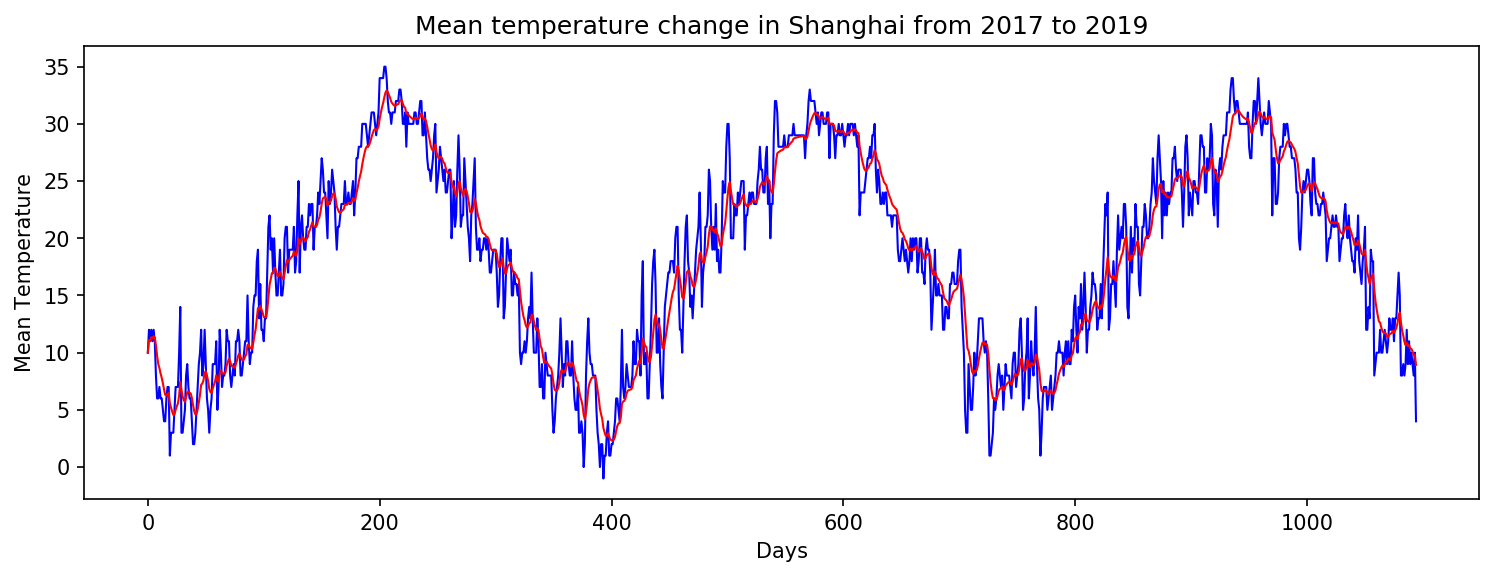

In [8]:
size = 12
roll_weighted_mean = pd.DataFrame.ewm(weather_df["meantemp"], span=size).mean()
plt.figure(figsize=(12, 4), dpi=150)
plt.plot(weather_df["meantemp"], color="blue", linewidth=1 )
plt.plot(roll_weighted_mean, color="red", linewidth=1)
plt.xlabel("Days") 
plt.ylabel("Mean Temperature")
plt.title("Mean temperature change in Shanghai from 2017 to 2019")
plt.show()

The pie chart and boxplot are used to calculate the variation range of average temperature in Shanghai from 2017 to 2019.

Basic statistic information for mean temperature of Shanghai from 2017 to 2019
count    1095.000000
mean       18.389041
std         8.538667
min        -1.000000
25%        11.000000
50%        19.000000
75%        25.000000
max        35.000000
Name: meantemp, dtype: float64


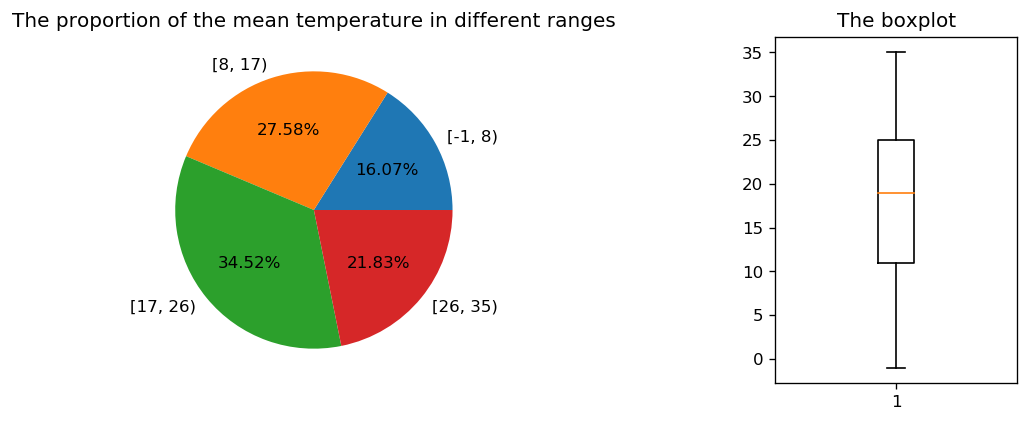

In [9]:
mean_temp = weather_df.set_index("date_time")["meantemp"]
print("Basic statistic information for mean temperature of Shanghai from 2017 to 2019")
print(mean_temp.describe())
max_t, min_t = mean_temp.max(), mean_temp.min() - 1 
pie_data = mean_temp.value_counts(bins=4, sort=False)
counts = pie_data.to_list()
index = pie_data.index.to_list()
ranges = list()
for inx in index:
    left, right = math.ceil(inx.left), math.ceil(inx.right)
    s = "[{}, {})".format(left, right)
    ranges.append(s)

figure, axes = plt.subplots(1, 2, figsize=(12,8), dpi=120)
grid = plt.GridSpec(4, 4)

plt.subplot(grid[1:3, 0:3])
plt.pie(counts, labels=ranges, autopct='%1.2f%%')
plt.title("The proportion of the mean temperature in different ranges")

plt.subplot(grid[1:3, 3])
plt.boxplot(mean_temp)
plt.title("The boxplot")

plt.show()

The scatter plot is used to examine the correlation between *FeelsLikeC* and *HeatIndexC*.

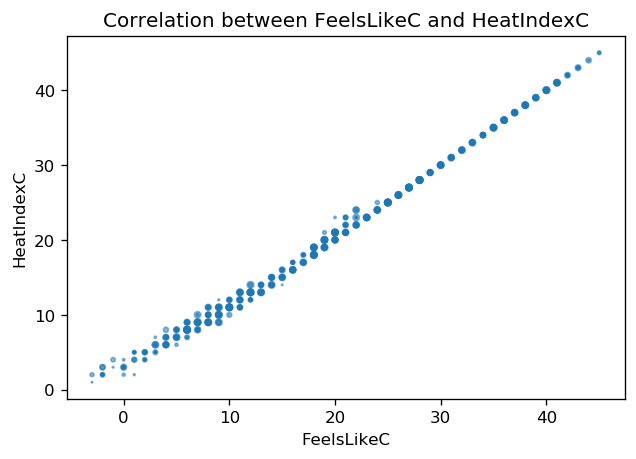

In [10]:
N = len(weather_df["FeelsLikeC"])
color = np.random.rand(N)
area = (4 * np.random.rand(N))**2  
plt.figure(figsize=(6, 4), dpi=120)
plt.scatter(weather_df["FeelsLikeC"], weather_df["HeatIndexC"], s=area, alpha=0.5)
# plt.colorbar()
plt.xlabel("FeelsLikeC") 
plt.ylabel("HeatIndexC")
plt.title("Correlation between FeelsLikeC and HeatIndexC")
plt.show()

Histogram is used to analyze the wind speed in Shanghai in 2019.

The probability density function for lognormal is used to fit the histogram of wind speed.

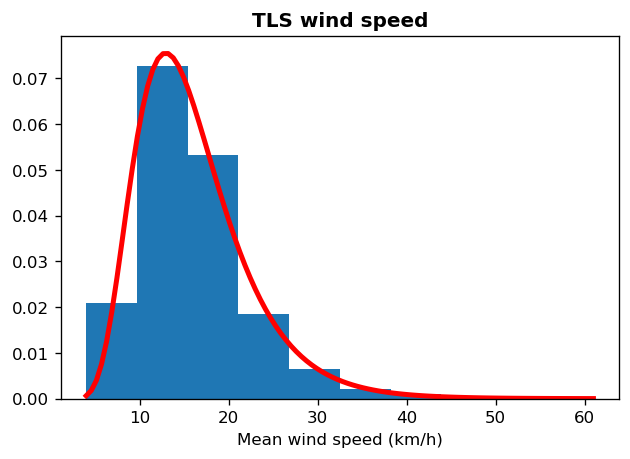

In [11]:
# weather_df.WindGustKmph.hist(bins=10);
wind = weather_df["WindGustKmph"]
shape, loc, scale = scipy.stats.lognorm.fit(wind, floc=0)
plt.figure(figsize=(6, 4), dpi=120)
plt.hist(wind, bins=10, density=True) # note: density 
support = np.linspace(wind.min(), wind.max(), 100)
plt.plot(support, scipy.stats.lognorm(shape,loc,scale).pdf(support), "r-", lw=3)
plt.title("TLS wind speed", weight="bold")
plt.xlabel("Mean wind speed (km/h)")
plt.show()

Analysis of daily maximum temperature difference in Shanghai from 2017 to 2019 using a line chart

Text(0.5, 1.0, 'Change of daily maximum temperature difference in Shanghai from 2017 to 2019')

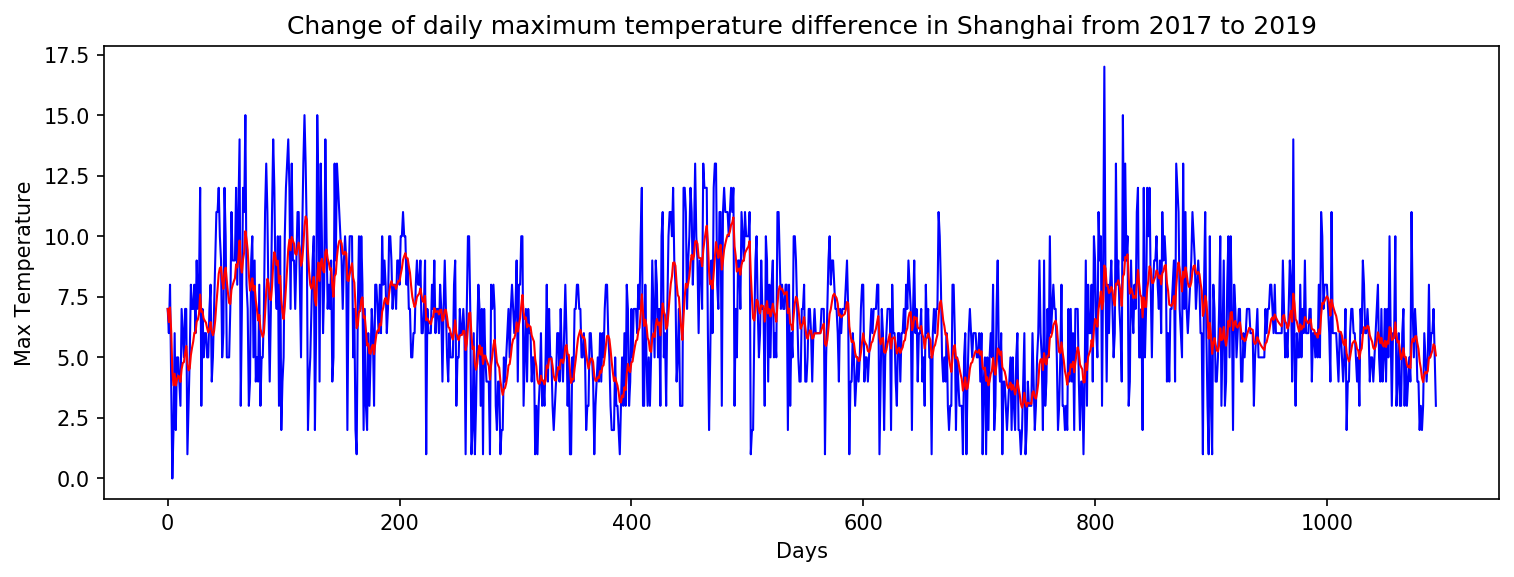

In [12]:
size = 12
roll_weighted_mean = pd.DataFrame.ewm(weather_df["maxtempdiff"], span=size).mean()
plt.figure(figsize=(12, 4), dpi=150)
plt.plot(weather_df["maxtempdiff"], color="blue", linewidth=1 )
plt.plot(roll_weighted_mean, color="red", linewidth=1)
plt.xlabel("Days")
plt.ylabel("Max Temperature")
plt.title("Change of daily maximum temperature difference in Shanghai from 2017 to 2019")

#### Question 1: Did the daily average temperature change periodically from 2017 to 2019?
Answer 1: In the past three years, the average temperature in Shanghai has changed periodically, and the change curve is similar to the sine curve.
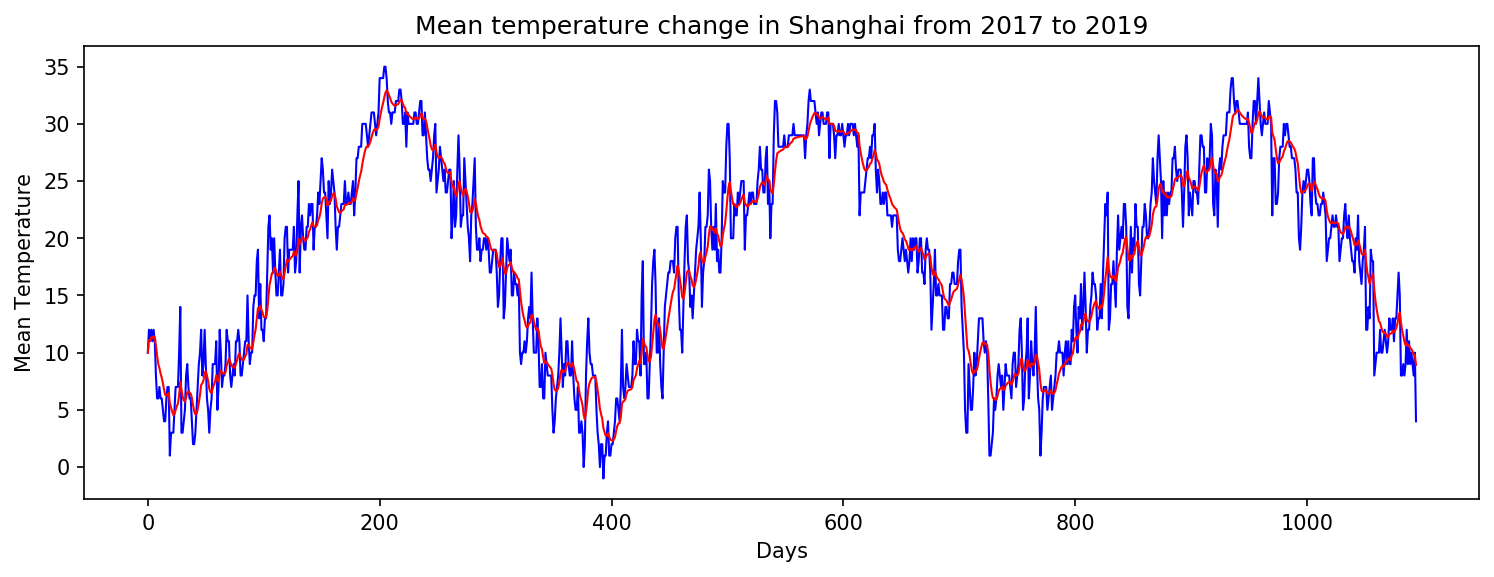

#### Question 2: Is there any correlation between *FeelsLikeC* and *HeatIndexC*?
Answer 2: There is a linear correlation between  *FeelsLikeC* and *HeatIndexC*.
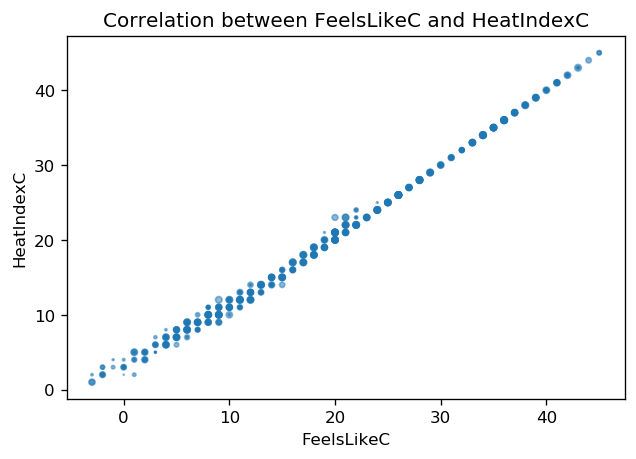

#### Question 3: What is the daily maximum temperature difference between 2017 and 2019 in Shanghai?

In [13]:
max_temp_diff = weather_df["maxtempdiff"]
value = max_temp_diff.max()
day = max_temp_diff.idxmax()
day = weather_df.loc[day]["date_time"]
print("Daily maximum temperature difference is {} degree.".format(value))
print("Date: ", day)
# max_temp_diff = pd.Series(weather_df, index=maxtempdiff)

Daily maximum temperature difference is 17 degree.
Date:  2019-03-20


# Step 4: Summarize and write a conclusion using markdown cells

During the three years from 2017 to 2019, Shanghai's average temperature showed a cyclical change, and there was no significant change in each year compared with the previous year. For the curve of daily maximum temperature difference, there is no strong periodicity. The maximum temperature difference in these three years is 17 degrees. From the pie chart of average temperature distribution, we can see that 17 to 26 degrees are the most common range, while - 1 to 8 degrees is the least. The maximum average temperature is 35 degrees; The minimum average temperature is - 1 degree; The average temperature of 25% days is lower than 11 degrees; The average temperature of 50% days is lower than 19 degrees; The average temperature of 75% days is lower than 25 degrees. The histogram of wind speed presents logarithmic positive distribution.

For the future analysis of relevant data, I suggest that for each variable, try various charts to analyze its changes and combine multiple variables with seeing the correlation between each variable.
